# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The task requires us to formulate a predictive model to analyze and quantify what factors drive the price of used cars. This involves gathering data on used cars being sold such as price, car make, model, condition, and more. Using techniques like regression and other machine learning algorithms, we can construct a model to predict the price of a car given input on features of said car. This will allow us to identify key drivers for used car prices and be able to predict what price a given used car may go for. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The first step to getting to know the dataset is to load the dataset.

A simple overview of what values we are working with can be provided with the .info() method that gives the names of all the columns, the count, the data type, and how many are non-null.

For columns with numerical data, we can use the .describe() method to provide some statistical data that can be useful for identifying outliers as well as the overall distribution.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


df = pd.read_csv("data/vehicles.zip")

In [2]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
df.drop(columns=['id']).describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [129]:
df.drop(columns = ['id']).corr()

C:\Users\Camer\AppData\Local\Temp\ipykernel_20164\2799438563.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(columns = ['id']).corr()


,price,year,odometer
price,1.000000,-0.004925,0.010032
year,-0.004925,1.000000,-0.157215
odometer,0.010032,-0.157215,1.000000


In [133]:
pd.crosstab(df['manufacturer'], [df['model'], df['year']])

model              "t" #NAME?                                            \
year            1913.0 1966.0 2002.0 2004.0 2009.0 2010.0 2011.0 2019.0   
manufacturer                                                              
acura                0      0      0      0      0      0      0      0   
alfa-romeo           0      0      0      0      0      0      0      0   
aston-martin         0      0      0      0      0      0      0      0   
audi                 0      0      0      0      0      0      0      0   
bmw                  0      0      0      0      0      0      0      0   
buick                0      0      0      0      0      0      0      0   
cadillac             0      0      0      0      0      0      0      0   
chevrolet            0      0      1      0      0      0      0      0   
chrysler             0      0      0      0      0      0      0      0   
datsun               0      0      0      0      0      0      0      0   
dodge                0      0      0      0      0      0      0      0   
ferrari              0      0      0      0      0      0      0      0   
fiat                 0      0      0      0      0      0      0      0   
ford                 1      1      0      0      0      0      0      0   
gmc                  0      0      0      0      0      0      0      0   
harley-davidson      0      0      0      0      0      0      0      0   
honda                0      0      0      0      0      0      0      0   
hyundai              0      0      0      0      0      0      1      0   
infiniti             0      0      0      0      0      0      0      0   
jaguar               0      0      0      0      0      0      0      0   
jeep                 0      0      0      0      0      0      0      0   
kia                  0      0      0      0      0      0      0      0   
land rover           0      0      0      0      0      0      0      0   
lexus                0      0      0      0      0      0      0      0   
lincoln              0      0      0      0      0      0      0      0   
mazda                0      0      0      0      0      0      0      0   
mercedes-benz        0      0      0      1      0      1      0      4   
mercury              0      0      0      0      0      0      0      0   
mini                 0      0      0      0      0      0      0      0   
mitsubishi           0      0      0      0      0      0      0      0   
nissan               0      0      0      0      0      0      0      0   
pontiac              0      0      0      0      0      0      0      0   
porsche              0      0      0      0      0      0      0      0   
ram                  0      0      0      0      0      0      0      0   
rover                0      0      0      0      0      0      0      0   
saturn               0      0      0      0      0      0      0      0   
subaru               0      0      0      0      1      0      0      0   
tesla                0      0      0      0      0      0      0      0   
toyota               0      0      0      0      0      0      0      0   
volkswagen           0      0      0      0      0      0      0      0   
volvo                0      0      0      0      0      0      0      0   

model           $362.47, $1000 down, oac, 2.9%apr $362.47,luxury low miles $1000 down, only 40k miles  \
year                                                                                           2018.0   
manufacturer                                                                                            
acura                                                            0                                      
alfa-romeo                                                       0                                      
aston-martin                                                     0                                      
audi                                                             0   

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [6]:
df_red = df.drop(columns=['size','region']) #region is redundant and size seems to be lacking in the dataset
df_drop_na = df_red.dropna(axis = 0) #remove rows with missing information
# df_drop_na.head()
df_drop_negatives = df_drop_na[(df_drop_na['id'] >= 0) &  #removes rows impossible values
                       (df_drop_na['price'] >= 0) & 
                       (df_drop_na['year'] >= 0) & 
                       (df_drop_na['odometer'] >= 0)]

df_drop_dup_id = df_drop_negatives.drop_duplicates(subset='id', keep='first') #drop entries with duplicate unqiue ids

df_cleaned = df_drop_dup_id.drop(columns = ["id", "VIN"]) #remove unneccesary columns, identifying ids are arbitrary and do 
                                                          #not affect the condition of the vehicle

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61005 entries, 32 to 426878
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         61005 non-null  int64  
 1   year          61005 non-null  float64
 2   manufacturer  61005 non-null  object 
 3   model         61005 non-null  object 
 4   condition     61005 non-null  object 
 5   cylinders     61005 non-null  object 
 6   fuel          61005 non-null  object 
 7   odometer      61005 non-null  float64
 8   title_status  61005 non-null  object 
 9   transmission  61005 non-null  object 
 10  drive         61005 non-null  object 
 11  type          61005 non-null  object 
 12  paint_color   61005 non-null  object 
 13  state         61005 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 7.0+ MB


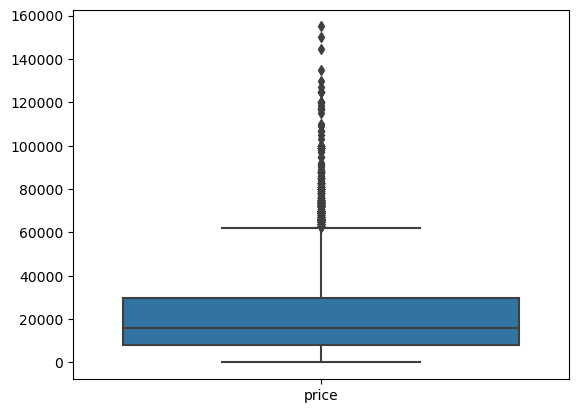

In [7]:
sns.boxplot(data=df_cleaned[['price']])
plt.show()

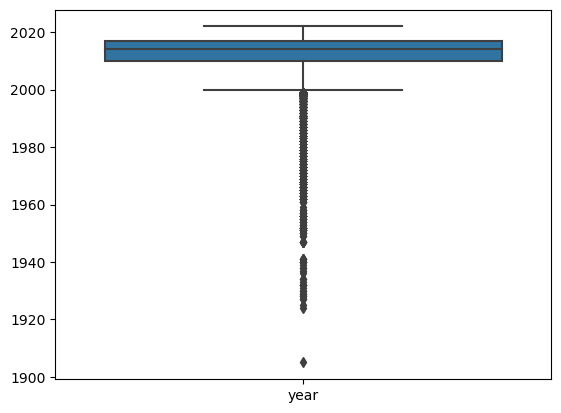

In [8]:
sns.boxplot(data=df_cleaned[['year']])
plt.show()

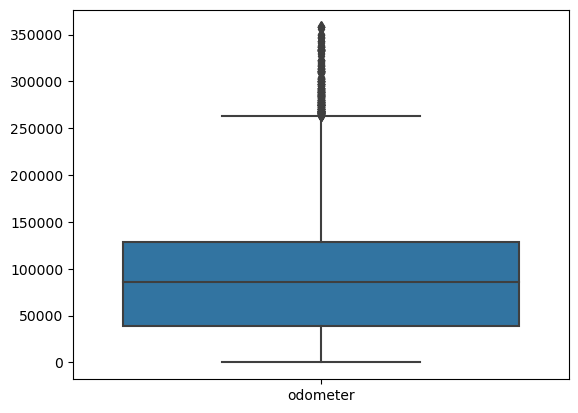

In [62]:
sns.boxplot(data=df_cleaned[['odometer']])
plt.show()

<Axes: xlabel='year', ylabel='price'>

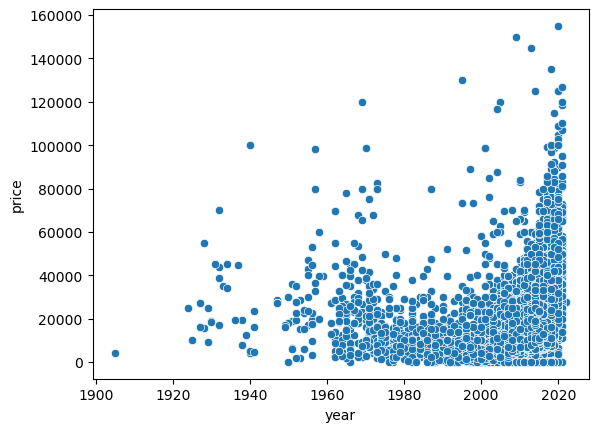

In [9]:
sns.scatterplot(data=df_cleaned, x='year', y='price')

<Axes: xlabel='odometer', ylabel='price'>

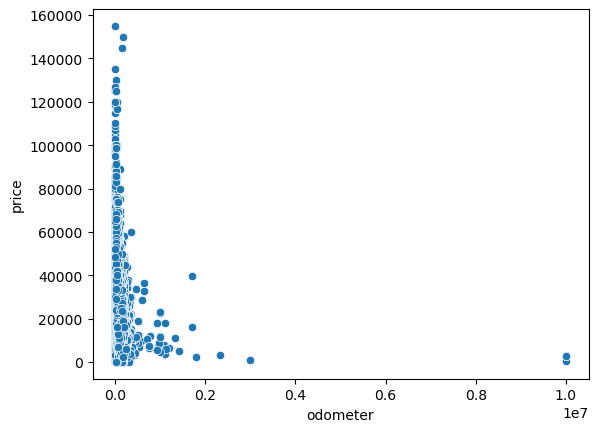

In [10]:
sns.scatterplot(data=df_cleaned, x='odometer', y='price')

In [72]:
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[df_cleaned['odometer'] <= (Q3 + 1.5 * IQR)] #remove outliers for odometer

Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[df_cleaned['year'] >= (Q1 - 1.5 * IQR)] #remove outliers for years

In [74]:
X = df_cleaned.drop(['price'], axis = 1)
y = np.log1p(df_cleaned['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 42)


df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59870 entries, 32 to 426878
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         59870 non-null  int64  
 1   year          59870 non-null  float64
 2   manufacturer  59870 non-null  object 
 3   model         59870 non-null  object 
 4   condition     59870 non-null  object 
 5   cylinders     59870 non-null  object 
 6   fuel          59870 non-null  object 
 7   odometer      59870 non-null  float64
 8   title_status  59870 non-null  object 
 9   transmission  59870 non-null  object 
 10  drive         59870 non-null  object 
 11  type          59870 non-null  object 
 12  paint_color   59870 non-null  object 
 13  state         59870 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 6.9+ MB


In [75]:
num_columns = ['year', 'odometer']
cat_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
              'transmission', 'drive','type', 'paint_color', 'state']

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [97]:
#LASSO MODEL
car_pipe = Pipeline([ 
    ('preprocessor', ColumnTransformer([
        ('num', Pipeline([
            ('polyfeatures', PolynomialFeatures(include_bias=False)),
            ('scaler', StandardScaler()) 
        ]), num_columns),
        
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_columns) #encode the categorical data
    ])),
    
    ('lasso', Lasso(random_state=42)) 
])


param_grid = {
    'preprocessor__num__polyfeatures__degree': [1, 2, 3],  # Degree of polynomial features
    'lasso__alpha': [0.01, 0.1, 1, 10]  # Regularization strength for Lasso
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=car_pipe, param_grid=param_grid, cv=3, n_jobs=1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: F

Best parameters: {'lasso__alpha': 0.01, 'preprocessor__num__polyfeatures__degree': 3}
Best score: 0.12930125042948795


In [101]:
car_pipe.fit(X_train, y_train)
lasso_coefs = car_pipe.named_steps['lasso'].coef_

print(type(lasso_coefs))
print(lasso_coefs)

<class 'numpy.ndarray'>
[ 0. -0.  0. ...  0.  0.  0.]


In [102]:
lasso_train_mse = mean_squared_error(y_train, car_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, car_pipe.predict(X_test))

print(lasso_train_mse)
print(lasso_test_mse)

5.966689330834659
5.957215135986989


C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [122]:
#RIDGE MODEL
ridge_pipe = Pipeline([ 
    ('preprocessor', ColumnTransformer([
        ('num', Pipeline([
            ('polyfeatures', PolynomialFeatures(include_bias=False)),
            ('scaler', StandardScaler())
        ]), num_columns),
        
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_columns) #encode the categorical data
    ])),
    
    ('ridge', Ridge(random_state=42)) 
])


param_grid = {
    'preprocessor__num__polyfeatures__degree': [1, 2, 3],  # Degree of polynomial features
    'ridge__alpha': [.01, .1, 1, 10, 25, 50]  # Regularization strength for Ridge
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=ridge_pipe, param_grid=param_grid, cv=3, n_jobs=1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: F

C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: F

Best parameters: {'preprocessor__num__polyfeatures__degree': 2, 'ridge__alpha': 1}
Best score: 0.26446305346414234


In [123]:
ridge_pipe.fit(X_train, y_train)
ridge_coefs = ridge_pipe.named_steps['ridge'].coef_

print(type(ridge_coefs))
print(ridge_coefs)

<class 'numpy.ndarray'>
[ 1.15919563 -0.29145975 -1.08265102 ... -0.51585696 -1.02572942
 -0.67935294]


In [124]:
ridge_train_mse = mean_squared_error(y_train, ridge_pipe.predict(X_train))
ridge_test_mse = mean_squared_error(y_test, ridge_pipe.predict(X_test))

print(ridge_train_mse)
print(ridge_test_mse)

3.670392630614199
4.3080026224139205


C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [86]:
#LINEAR REGRESSION MODEL
line_pipe = Pipeline([ 
    ('preprocessor', ColumnTransformer([
        ('num', Pipeline([
            ('polyfeatures', PolynomialFeatures(include_bias=False)),
            ('scaler', StandardScaler()),
        ]), num_columns),
        
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_columns) #encode the categorical data
    ])),
    
    ('linear', LinearRegression()) 
])


param_grid = {
      'preprocessor__num__polyfeatures__degree': [1, 2, 3],  # degree of polynomial features
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=line_pipe, param_grid=param_grid, cv=3, n_jobs=1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: F

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('polyfeatures',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['manufacturer',
                                                                          'model',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state'])])),
                                       ('linear', LinearRegression())]),
             n_jobs=1,
             param_grid={'preprocessor__num__polyfeatures__degree': [1, 2, 3]},
             verbose=1)

In [88]:
# Get the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'preprocessor__num__polyfeatures__degree': 2}
Best score: 0.2353535826585006


In [141]:
line_pipe.fit(X_train, y_train)
line_coefs = line_pipe.named_steps['linear'].coef_

print(type(line_coefs))
print(line_coefs)

<class 'numpy.ndarray'>
[ 73.32335713   5.13536086 -73.3034819  ...  -0.66719346  -1.14835026
  -0.86030886]


In [90]:
line_train_mse = mean_squared_error(y_train, line_pipe.predict(X_train))
line_test_mse = mean_squared_error(y_test, line_pipe.predict(X_test))

print(line_train_mse)
print(line_test_mse)

3.531813408934539
4.451289331436358


C:\Users\Camer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

A high-quality model is a model that would be able to adapt well to new, unseen data and provide various insights that could be acted upon in a way that benefits the buisness. Our buisness objective is to develop a model that can be able to provide insight into what features drive used car prices. Analyzing the MSE, a metric used to evaluate the performance of regression models, of our three models (Lasso, Ridge, and LinearRegression) has shown that LinearRegression and Ridge seem to be overfitting the training set of data. This maybe due to polynomial features creating too many features impacted by multicollinearity. The best scores provided by grid_search for all 3 models were all lower than .3, which shows that these models may not have a strong grasp of the significance of each feature in regards to the target. Based of coefficients from LinearRegression and Ridge, it seems that the newer the car, the more it is valued. It also seems that according to Ridge, more mileage on the car will lower its value. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

The three models chosen were Lasso, Ridge, and LinearRegression. All three regression models seem to perform rather poorly in caputuring what drives the prices for used cars. Although this maybe the case, newer cars have been shown to be valued higher, while cars with more mileage seem to sell for less. 